In [9]:
#Imnporting libraries
import pandas as pd
import numpy as np
from scipy.optimize import fmin_slsqp
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import math
import scipy
import scipy.stats as stats
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator

#Listing the existing files in the dir
for root, dirs, files in os.walk("."):  
    for filename in files:
        print(filename)

code.ipynb
COMMIT_EDITMSG
config
description
HEAD
index
applypatch-msg.sample
commit-msg.sample
fsmonitor-watchman.sample
post-update.sample
pre-applypatch.sample
pre-commit.sample
pre-push.sample
pre-rebase.sample
pre-receive.sample
prepare-commit-msg.sample
update.sample
exclude
HEAD
master
master
42a29f266ab659e685cef3802de3af0e1b61c7
872ad8190c605e1d9fc59f28d1f79ae53d89f8
a33ca8eed5e64a40f3eba250a9456699bc62a0
381bfa563cb65d2ec3985e03ebaa2359e10a71
9864d8ecfa50c20ab18f5b85d01278e59e7f0b
30de484fef1ecf25afffc168ba3db93f4d7b1a
5b3085f2e9829934c4a12c334426119a375377
16b12baa8b1a948a9e67981adb0454669ad9d7
666c30c1bf494e6cc5450522b02b91518ff2a2
aae65cbb38481bb2bbcfb9a366509f341e5415
5a9ef48e968702bd05910934e88288ee4d966f
0614393d2777410e9035f7aedccda203584bc8
6fc1ae2dad946024d09476d9a106472158e049
5b75490a4d94046231c610dfe8c7912d1b8237
75eacc1ccd1644ac81f05800c9dec1dc852166
0ffe61d871b78998937c8cf716d396e422b0b7
d746d04ada0c87965f2044228c09e200d60937
42140789af50e5fbbc8110153968c054be5c

In [3]:
#Creating a dataset
arr = [] 25, 48, 37, 41, 19, 32, 26, 16, 23, 23, 29, 36, 31, 26, 21, 32, 25, 31, 43, 35, 42, 38, 33, 28]
df = pd.DataFrame(arr)
df.columns = ['Values']

In [293]:
#Estimating the number of classses following the formula that 2 ** k > n
N = int(round(math.log(len(df['Values']), 2)))

#Calculating class width
intervals = ((df['Values'].max() - df['Values'].min()) / N).round(decimals = 0)
limits = []
limits.append(df['Values'].min() + intervals)

def classes(N):
    '''The function defines the lower limits'''
    n = 0
    while n < N:
        for n in range(0, N):
            limits.append(limits[n] + intervals)
            n += n                  
    return limits[:-2]  
classes(N)

def cl_equal_intevals(X):
    '''The function assigns lables depending on which interval a data point falls into'''    
    for x in X:
        if x < limits[1]: return '1'
        elif (x >= limits[1]) * (x < limits[2]): return '2'
        elif (x >= limits[2]) * (x < limits[3]): return '3'
        elif (x >= limits[3]) * (x < limits[4]): return '4'        
        else: return '5'
        
df['cluster'] = df[['Values']].apply(cl_equal_intevals, axis = 1)

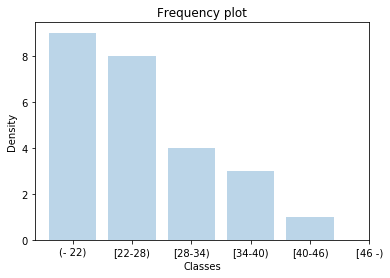

In [259]:
freq_tbl = pd.DataFrame(df.loc[:, ['Values', 'cluster']].groupby(str('cluster')).count().iloc[:,0]).reset_index()
#Building a frequency plot
fig, ax = plt.subplots()
ax.bar(freq_tbl['cluster'], freq_tbl['Values'], alpha = 0.3)
_ = plt.title('Frequency plot')
_ = plt.xlabel('Classes')
_ = plt.ylabel('Density')
_ = ax.set_xticks([0, 1,2,3, 4, 5]) 
_ = ax.set_xticklabels(['(- 22)','[22-28)','[28-34)', '[34-40)', '[40-46)', '[46 -)'])

In [292]:
#Estimating cumulative frequency
freq_tbl['Cumulative_frequency'] = freq_tbl['Values'].cumsum()
freq_tbl['Relative_cumulative_frequency'] = freq_tbl['Cumulative_frequency']/max(freq_tbl['Cumulative_frequency'])

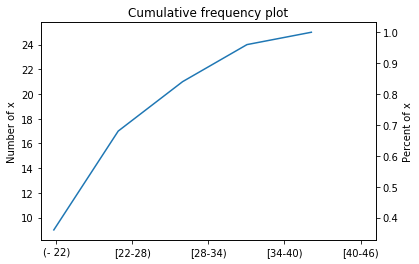

In [288]:
fig, ax1 = plt.subplots()
plt.plot(freq_tbl['cluster'], freq_tbl['Cumulative_frequency'], color='none')
ax1.set_ylabel("Number of x")

ax2 = ax1.twinx()
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.plot(freq_tbl['cluster'], freq_tbl['Relative_cumulative_frequency'])
ax2.set_xlabel("Value")
ax2.set_ylabel("Percent of x")
ax2.set_xticks([0, 1,2,3, 4, 5]) 
ax2.set_xticklabels(['(- 22)','[22-28)','[28-34)', '[34-40)', '[40-46)', '[46 -)'])

plt.title('Cumulative frequency plot')

plt.show()

In [291]:
#Calculating the average
df['Values'].mean()

30.72

In [314]:
#Calculating the weighted average
df_freq = df.groupby('Values').count()
df_freq = df_freq.reset_index()
def wavg(group, avg_name, weight_name):
    """ Calculating the weighted average in a df """
    d = group[avg_name]
    w = group[weight_name]
    return (d * w).sum() / w.sum()
wavg(df_freq, "Values", "cluster")

30

In [328]:
#Calculating the geometric average
scipy.stats.gmean(df["Values"],axis = 0)
def geom_mean(avg_name):
    return ((avg_name.iloc[-1] / avg_name.iloc[0]) ** (1/len(avg_name))) - 1
geom_mean(df['Values'])

29.70769883592722

Text(0.5,1,'Boxplot')

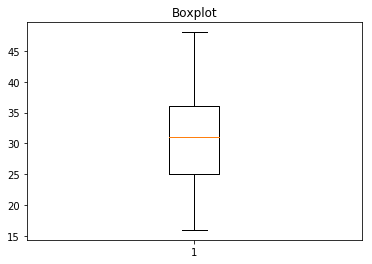

In [366]:
#Creating a boxplot
plt.boxplot(df['Values'])
plt.title('Boxplot')

In [384]:
#Calculating skeweness using PEARSON’S COEFFICIENT OF SKEWNESS 
arr = [557,	542,	419,	416,	396,	351,	313,	305,	285,	281,	269,	264,	252,	249,	248,	248,	240,	239,	235,	235,	233,	224,	219,	217,	211,	207,	205,	199,	198,	179,	178,	175,	174,	172,	169,	166,	165,	162,	157,	149,	145,	145,	136,	132,	128,	124,	120,	107,	107,	103,	100,	95,	94,	94,	92,	91,	80,	66,	59,	44]
df = pd.DataFrame(arr)
coef_of_skeweness = (3 * (df.mean() - df.median()))/ df.std()
#coef_of_skeweness > 0, thus, it indicates positive skeweness

0    0.678284
dtype: float64

In [8]:
#Calculating confidence interval using z distribution
bottom = np.mean(arr) - 1.96*np.std(arr)/(np.sqrt(len(arr)))
upper = np.mean(arr) + 1.96*np.std(arr)/(np.sqrt(len(arr)))
print '30 days 95% confidence inverval:', (bottom,upper)

10 days 95% confidence inverval: (27.658341974942335, 33.781658025057666)


30.72

In [21]:
arr = [7077,  5744,  6753,  7381,  7625,  6636,  7164,  7348,  8060,  5848,  9275,  7052]
#Calculating t statistic
t = (np.mean(arr)-6658)/(np.sqrt((((arr-np.mean(arr))**2)/(len(arr)-1)).sum())/np.sqrt(12)); t

1.8584970917620307

In [40]:
arr = [29.7 , 29.4  ,31.7  ,29.0  ,29.1  ,30.5 , 29.1 , 29.]
#Calculating t statistic
def t_stat(arr, pop_mean):
    """The function calculates t statistic"""
    return (np.mean(arr)-pop_mean)/(np.sqrt((((arr-np.mean(arr))**2)/(len(arr)-1)).sum())/np.sqrt(len(arr)))
t_stat(arr, 30)

29.6875

In [16]:
arr1 = [10, 12, 15, 19]
arr2 = [8, 9, 12, 15]
def t_statistic_two_sample(arr1, arr2):
    '''The function calculates t statistic for two-sample test of hypothesis for dependent samples'''
    substr = list(np.array(arr1) - np.array(arr2))
    avg = np.mean(substr)
    dif_from_mean = (substr - avg)**2
    st_dev = (sum(dif_from_mean)/ (len(arr1) - 1))**0.5
    t_statistic = avg / (st_dev / (len(arr1))**0.5)
    return t_statistic
t_statistic_two_sample(arr1, arr2)

7.3484692283495345

In [71]:
before = [ 6.6, 6.5, 9.0, 10.3, 11.2, 8.1, 6.3, 11.6]
after = [ 6.8 ,2.4, 7.4, 8.5, 8.1, 6.1, 3.4,  2]
t_statistic_two_sample(before, after)

3.0239233217564334

In [23]:
def z_statistic_two_sample(x_bar_1, x_bar_2, std_1, std_2, n_1, n_2):
    '''The function calculates z statistic for two-sample test of hypothesis with population mean known for independent samples'''
    z = (x_bar_1 - x_bar_2) / ((std_1**2 / n_1) + (std_2**2 / n_2))**0.5
    return z
z_statistic_two_sample(57000, 61000, 9200, 7100, 40, 30)

-2.0529474904193115

In [26]:
def t_statistic_two_sample_unequal(x_bar_1, x_bar_2, std_1, std_2, n_1, n_2):
    '''The function calculates t statistic when population standard deviation is unknown under the assumption that the populations are not equal'''
    df = ((std_1**2 / n_1) + (std_2**2 / n_2))**2 / (((std_1**2/n_1)**2)/(n_1 - 1) + ((std_2**2/n_2)**2)/(n_2 - 1))
    t = (x_bar_1 - x_bar_2) / ((std_1**2 / n_1) + (std_2**2 / n_2))**0.5
    return t, df
t_statistic_two_sample_unequal(83.55, 78.80, 10.50, 14.25, 10, 12)

(0.8985184172184417, 19.754137406789237)

In [54]:
def t_statistic_two_sample_equal(x_bar_1, x_bar_2, std_1, std_2, n_1, n_2):
    '''The function calculates t statistic when population standard deviation is unknow under the assumption that population have equal deviations'''
    sp = ((n_1 - 1)*std_1**2 + (n_2 - 1)*std_2**2) / (n_1 + n_2 - 2)
    t = (x_bar_1 - x_bar_2) / (sp * ((1/float(n_1)) + (1/float(n_2))))**0.5
    return sp,t
t_statistic_two_sample_equal(83.55, 78.80, 10.50, 14.25, 10, 12)

(161.296875, 0.87349397864763)

In [68]:
arr_1 = [138, 121,  88 ,115, 141, 125,96  ]
arr_2 = [128 ,134, 152 ,135, 114 ,106 ,112, 120]
def pre_processing(arr_1, arr_2):
    global x_bar_1, x_bar_2, std_1, std_2    
    x_bar_1 = np.mean(arr_1)
    x_bar_2 = np.mean(arr_2)
    std_1 = np.std(arr_1, ddof=1)
    std_2 = np.std(arr_2, ddof=1)
    return x_bar_1, x_bar_2, std_1, std_2
pre_processing(arr_1, arr_2)
t_statistic_two_sample_equal(x_bar_1, x_bar_2, std_1, std_2, 7, 8)

(117.71428571428571, 125.125, 19.914101249401856, 15.094346150605057)

In [70]:
t_statistic_two_sample_equal(150000, 180000,40000,30000,15,25)

(1157894736L, -2.699431759367405)

In [504]:
#Anova
arr_1 = [98, 78, 54, 57, 68, 64, 70]
arr_2 = [75, 81, 81, 30, 82, 46, 58, 101]
stats.f_oneway(arr_1, arr_2)

F_onewayResult(statistic=0.0035778396781182293, pvalue=0.9532126914971771)

In [505]:
#Another way to do Anova
#One-way Anova
arr_1 = [18, 16, 21, 23, 25]
arr_2 = [17, 23, 21, 22, 24]
arr_3 = [21, 23, 26, 29, 28]
arr_4 = [22, 22, 22, 25, 28]
lst = arr_1 + arr_2 + arr_3 + arr_4
def variation(data): 
    """The function calculates variations"""
    global avg
    avg = sum(data) / float(len(data))  
    vari = 0
    for d in data:
        vari += (d - avg)**2
    return vari
SSE = variation(arr_1) + variation(arr_2) + variation(arr_3) + variation(arr_4)
SS = variation(lst)
SST = SS - SSE
def f_statistic(SST, SSE, n_arr, lst):
    """The function calculation f statistic"""
    MST = SST / (n_arr - 1)
    MSE = SSE / (len(lst) - n_arr)
    return MST / MSE
f_statistic(SST, SSE, 4, lst)

-0.1860550011026497

In [447]:
#Alternative way to calculate one-way Anova
arr_1 = [18, 16, 21, 23, 25]
arr_2 = [17, 23, 21, 22, 24]
arr_3 = [21, 23, 26, 29, 28]
arr_4 = [22, 22, 22, 25, 28]
df = pd.DataFrame(np.vstack((arr_1, arr_2, arr_3, arr_4)))
df = df.T
def SS(data): 
    """The function calculates SS"""
    avg = (float(data.values.sum()) / float(data.size))
    vari = ((data - avg)**2).values.sum()
    return vari
def SSE(data): 
    """The function calculates SSE"""
    vari = ((data - np.mean(data))**2).values.sum()
    return vari
def SST(SS, SSE):
    """The function calculates SST"""
    dif = SS - SSE
    return dif
def f_statistic(SST, SSE, n_treat, data):
    """The function calculation f statistic"""
    MST = SST / (n_treat - 1)
    MSE = SSE / (float(data.size) - n_treat)
    return (MST/MSE)
f_statistic(SST(SS(df), SSE(df)), SSE(df), 4, df)

2.4825234441602726

In [483]:
#Two-way Anova
#Alternative way to calculate one-way Anova
arr_1 = [18, 16, 21, 23, 25]
arr_2 = [17, 23, 21, 22, 24]
arr_3 = [21, 23, 26, 29, 28]
arr_4 = [22, 22, 22, 25, 28]
df = pd.DataFrame(np.vstack((arr_1, arr_2, arr_3, arr_4)))
df = df.T
def SS(data): 
    """The function calculates SS"""
    global global_avg
    global_avg = (float(data.values.sum()) / float(data.size))
    vari = ((data - global_avg)**2).values.sum()
    return vari
def SSB(data, n_treat):
    SS(data)
    """The function calculates SSB"""
    local_avg =  np.mean(data, axis = 1)
    vari = (n_treat * (local_avg - global_avg)**2).values.sum()
    return vari
def SSE(data): 
    """The function calculates SSE"""
    vari = ((data - np.mean(data))**2).values.sum()
    return vari
def SST(SS, SSE):
    """The function calculates SST"""
    dif = SS - SSE
    return dif
def SSE_2(SS, SST, SSB): 
    """The function calculates SSE"""
    dif = SS - SST - SSB
    return dif
def f_statistic(SST, SSE_2, n_treat, data):
    """The function calculation f statistic"""
    MST = SST / (n_treat - 1)
    MSE = SSE_2 / ((n_treat - 1)*(len(data.index) - 1))
    return (MST / MSE)
f_statistic(SST(SS(df), SSE(df)), SSE_2(SS(df), SST(SS(df), SSE(df)), SSB(df, 4)), 4, df)

7.934604904632144

In [503]:
arr_1 = [31, 33, 28, 30, 28]
arr_2 = [25, 26, 24, 29, 26]
arr_3 = [35, 33, 30, 28, 27]
df = pd.DataFrame(np.vstack((arr_1, arr_2, arr_3)))
df = df.T
def SS(data): 
    """The function calculates SS"""
    global global_avg
    global_avg = (float(data.values.sum()) / float(data.size))
    vari = ((data - global_avg)**2).values.sum()
    return vari
def SSB(data, n_treat):
    SS(data)
    """The function calculates SSB"""
    local_avg =  np.mean(data, axis = 1)
    vari = (n_treat * (local_avg - global_avg)**2).values.sum()
    return vari
def SSE(data): 
    """The function calculates SSE"""
    vari = ((data - np.mean(data))**2).values.sum()
    return vari
def SST(SS, SSE):
    """The function calculates SST"""
    dif = SS - SSE
    return dif
def SSE_2(SS, SST, SSB): 
    """The function calculates SSE"""
    dif = SS - SST - SSB
    return dif
def f_statistic(SST, SSE_2, SSB, n_treat, data):
    """The function calculation f statistic"""
    MST = SST / (n_treat - 1)
    MSE = SSE_2 / ((n_treat - 1)*(len(data.index) - 1))
    treatment_f = (MST / MSE)
    MSB = SSB / (len(data.index)-1)
    blocks_f = MSB / MSE
    return blocks_f, treatment_f
f_statistic(SST(SS(df), SSE(df)), SSE_2(SS(df), SST(SS(df), SSE(df)), SSB(df, 3)), SSB(df, 3), 3, df)

(1.5521472392638054, 5.754601226993868)

In [510]:
#Exercise
arr_1 = [31, 33, 28, 30, 28]
arr_2 = [25, 26, 24, 29, 26]
lst = arr_1 + arr_2
def variation(data): 
    """The function calculates variations"""
    global avg
    avg = sum(data) / float(len(data))  
    vari = 0
    for d in data:
        vari += (d - avg)**2
    return vari
SSE = variation(arr_1) + variation(arr_2)
SS = variation(lst)
SST = SS - SSE
def f_statistic(SST, SSE, n_arr, lst):
    """The function calculation f statistic"""
    MST = SST / (n_arr - 1)
    MSE = SSE / (len(lst) - n_arr)
    return MST / MSE
f_statistic(SST, SSE, 2, lst)
#stats.f_oneway(arr_1, arr_2, arr_3, arr_4)

23.09774436090225

In [5]:
#Correlation and regression analysis
arr_1 = [4,2,5,6,3 ]
arr_2 = [15,8,21,24,17]
pearson_coef, p_value = stats.pearsonr(arr_1, arr_2) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

('Pearson Correlation Coefficient: ', 0.9295160030897801, 'and a P-value of:', 0.02222408873329552)


In [7]:
#To check if there are 0 correlation in the population
def t_test_pearson(r, n):
    """The function calculates t statistic for pearson coefficient"""
    t = (r * ((n - 2)**0.5)) / (1 - r**2)**0.5
    return t
t_test_pearson(0.78, 20)

5.288219992055153

In [14]:
#Coming up with regression equation
x = [89.2, 18.6, 18.2, 71.7, 58.6, 46.8, 17.5, 11.9, 19.6, 51.2, 28.6, 69.2]
y = [4.9, 4.4, 1.3, 8, 6.6, 4.1, 2.6, 1.7, 3.5, 8.2, 6, 12.8]
def regression_equation(arr_1, arr_2):
    """The function prepares the regression equation"""
    x_bar = np.mean(arr_1)
    y_bar = np.mean(arr_2)
    std_x = np.std(arr_1)
    std_y = np.std(arr_2)    
    pearson_coef, p_value = stats.pearsonr(arr_1, arr_2)
    b = pearson_coef * (float(std_y) / float(std_x))
    a = y_bar - b * x_bar
    return a, b, pearson_coef
regression_equation(x, y)

(1.8517358730279514, 0.083574475201885, 0.6734992524898942)

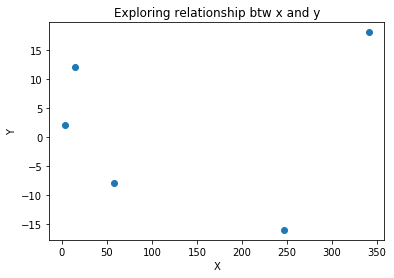

('Pearson Correlation Coefficient: ', 0.09949013553610223, 'and a P-value of:', 0.873534513718366)


In [9]:
arr_1 = [-8, -16, 12, 2, 18]
arr_2 = [58, 247, 15, 3, 341]
plt.scatter(arr_2,arr_1)
_= plt.title('Exploring relationship btw x and y')
_ = plt.ylabel('Y')
_= plt.xlabel('X')
plt.show()
pearson_coef, p_value = stats.pearsonr( arr_2,arr_1) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

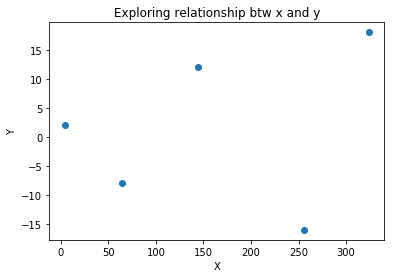

('Pearson Correlation Coefficient: ', 0.09949013553610223, 'and a P-value of:', 0.873534513718366)


In [13]:
#Transforming x to get linear relationship
arr_1_2 = []
arr_1 = [-8, -16, 12, 2, 18]

for i in arr_1:
    l = i **2
    arr_1_2.append(l)
arr_2 = [58, 247, 15, 3, 341]
plt.scatter(arr_1_2,arr_1)
_= plt.title('Exploring relationship btw x and y')
_ = plt.ylabel('Y')
_= plt.xlabel('X')
plt.show()
pearson_coef, p_value = stats.pearsonr( arr_2,arr_1) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

In [16]:
def t_test_pearson(r, n):
    """The function calculates t statistic for pearson coefficient"""
    t = (r * ((n - 2)**0.5)) / (1 - r**2)**0.5
    return t
t_test_pearson(0.47, 12)

1.6838416815035282

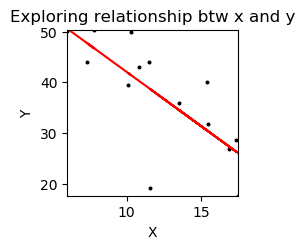

('Pearson Correlation Coefficient: ', -0.7468153584290134, 'and a P-value of:', 0.0021481940789066585)


-3.8901082285424042

In [39]:
x = [6, 7.8, 7.3, 10.3, 10.1, 10.8, 11.5, 15.4, 13.5, 15.5, 17.4, 16.9, 11.6, 17.5]
y = [50.2, 50.4, 44, 49.9, 39.5, 43.1, 44, 40.1, 36, 31.7, 28.6, 26.9, 19.1, 17.6]

fig = plt.figure(figsize=(2.2,2.2), dpi=100)
ax = plt.subplot(111)
plt.xlim(np.min(x), np.max(x))
plt.ylim(np.min(y), np.max(y))
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x)+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x,y, color="k", s=3.5)
_= plt.title('Exploring relationship btw x and y')
_ = plt.ylabel('Y')
_= plt.xlabel('X')
plt.show()
pearson_coef, p_value = stats.pearsonr( x,y) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

def t_test_pearson(r, n):
    """The function calculates t statistic for pearson coefficient"""
    t = (r * ((n - 2)**0.5)) / (1 - r**2)**0.5
    return t
t_test_pearson(-0.7468153584290134, 14)

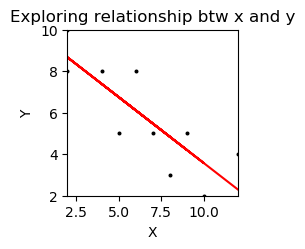

('Pearson Correlation Coefficient: ', -0.8269396448751986, 'and a P-value of:', 0.0031666897449715795)


-4.159660741505594

In [41]:
x = [12, 2, 6, 9, 7, 2, 8, 4, 10, 5]
y = [4, 10, 8, 5, 5, 8, 3, 8, 2, 5]

fig = plt.figure(figsize=(2.2,2.2), dpi=100)
ax = plt.subplot(111)
plt.xlim(np.min(x), np.max(x))
plt.ylim(np.min(y), np.max(y))
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x)+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x,y, color="k", s=3.5)
_= plt.title('Exploring relationship btw x and y')
_ = plt.ylabel('Y')
_= plt.xlabel('X')
plt.show()
pearson_coef, p_value = stats.pearsonr( x,y) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

def t_test_pearson(r, n):
    """The function calculates t statistic for pearson coefficient"""
    t = (r * ((n - 2)**0.5)) / (1 - r**2)**0.5
    return t
t_test_pearson(-0.8269396448751986, 10)

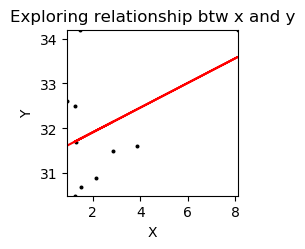

('Pearson Correlation Coefficient: ', 0.44972718100719067, 'and a P-value of:', 0.19221217954551825)


1.4241704118813943

In [43]:
x = [2.833, 1.233, 2.144, 3.849, 8.124, 1.448, 1.51, 1.297, 1.257, 0.930]
y = [31.5, 30.5, 30.9, 31.6, 34.2, 34.2, 30.7, 31.7, 32.5, 32.6]

fig = plt.figure(figsize=(2.2,2.2), dpi=100)
ax = plt.subplot(111)
plt.xlim(np.min(x), np.max(x))
plt.ylim(np.min(y), np.max(y))
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x)+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x,y, color="k", s=3.5)
_= plt.title('Exploring relationship btw x and y')
_ = plt.ylabel('Y')
_= plt.xlabel('X')
plt.show()
pearson_coef, p_value = stats.pearsonr( x,y) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 


def t_test_pearson(r, n):
    """The function calculates t statistic for pearson coefficient"""
    t = (r * ((n - 2)**0.5)) / (1 - r**2)**0.5
    return t
t_test_pearson(0.44972718100719067, 10)

In [45]:
x = [9, 9, 3, 10, 5, 10, 7, 11, 6, 6, 4, 7, 7, 7, 6]
y = [5.1, 8, 9.7, 7.8, 7.7, 5.5, 8.3, 5.5, 10.3, 8, 8.8, 9.4, 8.6, 8.1, 7.8]
def regression_equation(arr_1, arr_2):
    """The function prepares the regression equation"""
    x_bar = np.mean(arr_1)
    y_bar = np.mean(arr_2)
    std_x = np.std(arr_1)
    std_y = np.std(arr_2)    
    pearson_coef, p_value = stats.pearsonr(arr_1, arr_2)
    b = pearson_coef * (float(std_y) / float(std_x))
    a = y_bar - b * x_bar
    return a, b, pearson_coef
regression_equation(x, y)

(11.235985533453887, -0.4667269439421337, -0.7063806858888756)

In [11]:
#Indices
p_c_list = []
p_t = [69220, 54818, 55177, 65694, 83040, 88378, 97420, 98608]
for p in p_t:
    p_comp = (float(p)/ float(p_t[0]) ) * 100
    p_c_list.append(p_comp)
print p_c_list

[100.0, 79.19387460271598, 79.71251083501878, 94.9060965039006, 119.96532793990175, 127.67697197341809, 140.73967061542908, 142.45593759029182]


In [17]:
p_c_list = []
p_t = [486.6, 506.8, 522.2 ,574.6, 580.7, 568.5, 581.9, 496.1, 456.6, 433.3]
for p in p_t:
    p_comp = (float(p)/ float((p_t[0]+p_t[1]+p_t[2])/3 )) * 100
    p_c_list.append(p_comp)
print p_c_list

[96.31828978622327, 100.31670625494853, 103.3650039588282, 113.73713380839273, 114.944576405384, 112.52969121140141, 115.18210609659538, 98.1987331749802, 90.38004750593825, 85.7680126682502]


505.20000000000005

In [28]:
p_0 = [2.49, 3.29, 1.59, 1.79]
q_0 = [6, 4, 2, 3]
p_t = [ 3.35, 4.49, 4.19, 2.49]
q_t = [ 6, 5, 3, 4]
p_c_list = []
for p in p_t:
    p_comp = (float(p)/ float((p_0[0] + p_0[1] + p_0[2] + p_0[3])/4) ) * 100
    p_c_list.append(p_comp)
print p_c_list
p_simple_agg = float((p_t[0] + p_t[1] + p_t[2] + p_t[3])) / float((p_0[0] + p_0[1] + p_0[2] + p_0[3]))
print p_simple_agg

[146.2882096069869, 196.0698689956332, 182.96943231441048, 108.73362445414847]
1.58515283843
[14.940000000000001, 9.96, 4.98, 7.470000000000001, 19.740000000000002, 13.16, 6.58, 9.870000000000001, 9.540000000000001, 6.36, 3.18, 4.7700000000000005, 10.74, 7.16, 3.58, 5.37]


In [52]:
#Calculating Laspeyres price index
df_base = pd.DataFrame(np.vstack((p_0, q_0)))
df_base = df_base.T
df_base.columns = ['price_2000', 'qunatity_2010']
p0_q0 = df_base.iloc[:,0].multiply(df_base.iloc[:,1]).sum()

df_t = pd.DataFrame(np.vstack((p_t, q_t)))
df_t = df_t.T
df_t.columns = ['price_2017', 'qunatity_2017']
pt_q0 = df_t.iloc[:,0].multiply(df_base.iloc[:,1]).sum()
lasp_index = (pt_q0 / p0_q0) * 100

In [53]:
#Calculating Paashce price index
df_base = pd.DataFrame(np.vstack((p_0, q_0)))
df_base = df_base.T
df_t = pd.DataFrame(np.vstack((p_t, q_t)))
df_t = df_t.T
df_t.columns = ['price_2017', 'qunatity_2017']
pt_q0 = df_t.iloc[:,0].multiply(df_t.iloc[:,1]).sum()

df_base.columns = ['price_2000', 'qunatity_2010']
p0_q0 = df_base.iloc[:,0].multiply(df_t.iloc[:,1]).sum()
paasheche_index = (pt_q0 / p0_q0)*100

In [55]:
#Calculating Fisher's Ideal index
fisher_index = ((lasp_index * paasheche_index)**0.5)
print(lasp_index, paasheche_index, fisher_index)

(147.09413369713508, 150.2308402585411, 148.6542138737506)


In [67]:
#Value index
p_0 = [1.81, 3.56,2.32,2.72]
q_0 = [116,2, 8967, 227]
p_t = [ 2.09, 5.99, 3.65, 5.53]
q_t = [ 90, 2, 13601, 214]
df = pd.DataFrame(np.vstack((p_0, q_0,p_t, q_t)))
df = df.T
df.columns = ['price_02', 'qnty_02', 'price_15', 'qnty_15']
v = ((df.iloc[:,2].multiply(df.iloc[:,3]).sum())  / (df.iloc[:,0].multiply(df.iloc[:,1]).sum()))*100 

235.82236957642957

[100.0, 114.4894894894895, 129.67775467775468, 145.95749595749595, 15.996765996765996, 163.87733887733887, 171.95079695079696, 187.36428736428735, 186.58466158466157, 178.3841533841534, 169.998844998845, 166.93809193809196, 172.26842226842228, 184.2804342804343, 200.86625086625088, 206.09263109263108]


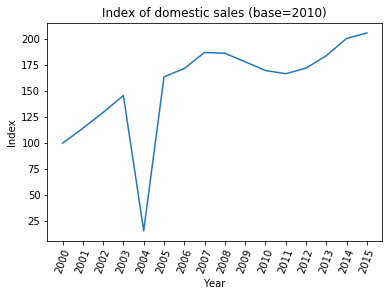

In [16]:
p_domestic = [17316, 19825, 22455, 25274, 2770, 28377, 29775, 32444, 32309, 30889, 29437, 28907, 29830, 31910, 34782, 35687]
p_international = [11856, 12492, 13843, 16588, 19578, 22137, 23549, 28651, 31438, 31008, 32124, 36107, 37394, 39402, 39548, 34387]
p_employees = [100.9, 101.8, 108.3, 110.6, 109.9, 115.6, 122.2, 119.2, 118.7, 115.5, 114, 117.9, 127.6, 128.1, 126.5, 127.1]
p_dom = []
for p in p_domestic:
    p_comp = (float(p)/ float(p_domestic[0])) * 100
    p_dom.append(p_comp)
print p_dom
plt.plot(p_dom)
_= plt.title('Index of domestic sales (2000=100)')
_ = plt.xticks(np.arange(16), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'))
_ = plt.xticks(rotation=70)
_ = plt.ylabel('Index')
_ = plt.xlabel('Year')
plt.show()

[100.0, 105.36437246963564, 116.75944669365721, 139.91228070175438, 165.13157894736844, 186.7155870445344, 198.62516869095816, 241.65823211875846, 265.16531713900133, 261.53846153846155, 270.95141700404855, 304.5462213225371, 315.40148448043186, 332.33805668016197, 333.56950067476384, 290.0387989203779]


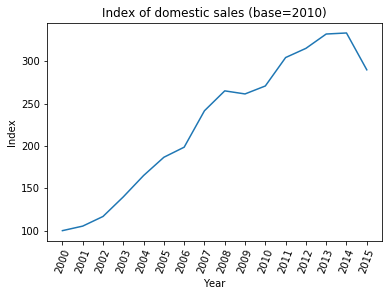

In [17]:
p_int = []
for p in p_international:
    p_comp_in = (float(p)/ float(p_international[0])) * 100
    p_int.append(p_comp_in)
print p_int
plt.plot(p_int)
_= plt.title('Index of domestic sales (2000=100)')
_ = plt.xticks(np.arange(16), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'))
_ = plt.xticks(rotation=70)
_ = plt.ylabel('Index')
_ = plt.xlabel('Year')
plt.show()

[100.0, 100.89197224975221, 107.33399405351834, 109.61347869177402, 108.91972249752232, 114.5688800792864, 121.11000991080276, 118.13676907829533, 117.64122893954409, 114.46977205153617, 112.98315163528245, 116.84836471754213, 126.46184340931615, 126.95738354806738, 125.37165510406342, 125.96630327056491]


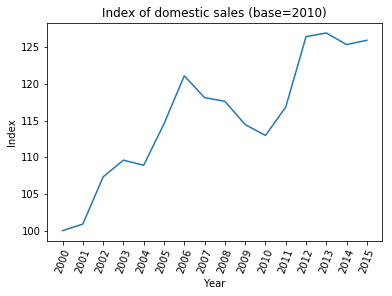

In [18]:
p_empl = []
for p in p_employees:
    p_comp_emp = (float(p)/ float(p_employees[0])) * 100
    p_empl.append(p_comp_emp)
print p_empl
plt.plot(p_empl)
_= plt.title('Index of domestic sales (2000=100)')
_ = plt.xticks(np.arange(16), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'))
_ = plt.xticks(rotation=70)
_ = plt.ylabel('Index')
_ = plt.xlabel('Year')
plt.show()

[100.0, 113.43283582089552, 117.16417910447761, 125.37313432835822, 132.08955223880596, 136.56716417910448, 111.94029850746267, 109.70149253731343, 109.70149253731343, 108.95522388059702, 111.19402985074626, 112.68656716417911]


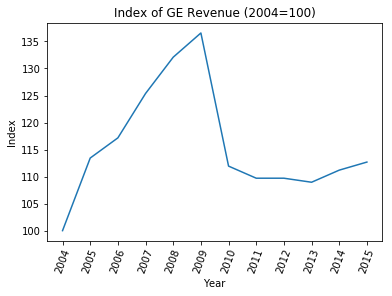

In [25]:
p_revenue = [134, 152, 157, 168, 177, 183, 150, 147, 147, 146, 149, 151]
p_employees= [325, 307, 316, 319, 327, 323, 304, 287, 301, 307, 305, 333]
p_revenue_list = []
for p in p_revenue:
    p_com_rev = (float(p)/ float(p_revenue[0])) * 100
    p_revenue_list.append(p_com_rev)
print p_revenue_list
plt.plot(p_revenue_list)
_= plt.title('Index of GE Revenue (2004=100)')
_ = plt.xticks(np.arange(12), ('2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'))
_ = plt.xticks(rotation=70)
_ = plt.ylabel('Index')
_ = plt.xlabel('Year')
plt.show()

[100.0, 94.46153846153847, 97.23076923076923, 98.15384615384616, 100.61538461538461, 99.38461538461539, 93.53846153846153, 88.3076923076923, 92.61538461538461, 94.46153846153847, 93.84615384615384, 102.46153846153847]


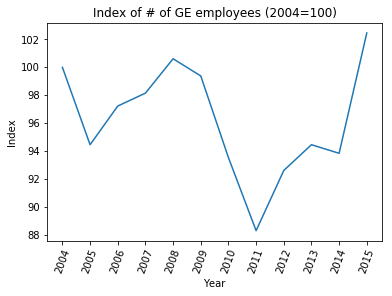

In [26]:
p_empl_list = []
for p in p_employees:
    p_com_empl = (float(p)/ float(p_employees[0])) * 100
    p_empl_list.append(p_com_empl)
print p_empl_list
plt.plot(p_empl_list)
_= plt.title('Index of # of GE employees (2004=100)')
_ = plt.xticks(np.arange(12), ('2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'))
_ = plt.xticks(rotation=70)
_ = plt.ylabel('Index')
_ = plt.xlabel('Year')
plt.show()

In [37]:
p_0 = [0.81, 0.84, 1.44, 2.91]
q_0 = [18, 5, 70, 27]
p_t = [2, 1.88, 2.89, 3.99]
q_t = [27, 9, 65, 33]
#Calculating simple index
p_simple = [float((ai)/bi)*100 for ai,bi in zip(p_t,p_0)]

#Calculating Laspeyres price index
df_base = pd.DataFrame(np.vstack((p_0, q_0)))
df_base = df_base.T
df_base.columns = ['price_2000', 'qunatity_2000']
p0_q0 = df_base.iloc[:,0].multiply(df_base.iloc[:,1]).sum()
df_t = pd.DataFrame(np.vstack((p_t, q_t)))
df_t = df_t.T
df_t.columns = ['price_2016', 'qunatity_2016']
pt_q0 = df_t.iloc[:,0].multiply(df_base.iloc[:,1]).sum()
lasp_index = (pt_q0 / p0_q0) * 100

#Calculating Paashce price index
df_base = pd.DataFrame(np.vstack((p_0, q_0)))
df_base = df_base.T
df_t = pd.DataFrame(np.vstack((p_t, q_t)))
df_t = df_t.T
df_t.columns = ['price_2016', 'qunatity_2016']
pt_q0 = df_t.iloc[:,0].multiply(df_t.iloc[:,1]).sum()
df_base.columns = ['price_2000', 'qunatity_2000']
p0_q0 = df_base.iloc[:,0].multiply(df_t.iloc[:,1]).sum()
paasheche_index = (pt_q0 / p0_q0)*100

#Calculating Fisher's Ideal index
fisher_index = ((lasp_index * paasheche_index)**0.5)
print(p_simple, lasp_index, paasheche_index, fisher_index)

([246.91358024691357, 223.80952380952382, 200.69444444444446, 137.11340206185568], 179.3742114559677, 178.23427371496393, 178.80333414690222)


In [36]:
p_0 = [0.50, 1.20, 0.85]
q_0 = [320, 110, 230]
p_t = [0.60, 0.90, 1]
q_t = [340, 130, 250]
#Calculating simple index
p_simple = [float((ai)/bi)*100 for ai,bi in zip(p_t,p_0)]

#Calculating Laspeyres price index
df_base = pd.DataFrame(np.vstack((p_0, q_0)))
df_base = df_base.T
df_base.columns = ['price_2000', 'qunatity_2000']
p0_q0 = df_base.iloc[:,0].multiply(df_base.iloc[:,1]).sum()
df_t = pd.DataFrame(np.vstack((p_t, q_t)))
df_t = df_t.T
df_t.columns = ['price_2016', 'qunatity_2016']
pt_q0 = df_t.iloc[:,0].multiply(df_base.iloc[:,1]).sum()
lasp_index = (pt_q0 / p0_q0) * 100

#Calculating Paashce price index
df_base = pd.DataFrame(np.vstack((p_0, q_0)))
df_base = df_base.T
df_t = pd.DataFrame(np.vstack((p_t, q_t)))
df_t = df_t.T
df_t.columns = ['price_2016', 'qunatity_2016']
pt_q0 = df_t.iloc[:,0].multiply(df_t.iloc[:,1]).sum()
df_base.columns = ['price_2000', 'qunatity_2000']
p0_q0 = df_base.iloc[:,0].multiply(df_t.iloc[:,1]).sum()
paasheche_index = (pt_q0 / p0_q0)*100

#Calculating Fisher's Ideal index
fisher_index = ((lasp_index * paasheche_index)**0.5)
print(p_simple, lasp_index, paasheche_index, fisher_index)

([120.0, 75.0, 117.64705882352942], 106.87179487179488, 106.03528319405757, 106.45271736638759)
